In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.linalg import inv, sqrtm
from scipy.stats import pearsonr


# 1. Analyze Categories

In [29]:
daily_category_sales = pd.read_csv('../data/daily_category_sales.csv',index_col=0, header=[0,1])
daily_category_quantity = daily_category_sales['quantity_sum'].copy()
daily_category_quantity.head()

category_name,Aquatic Roots and Tubers,Cauliflower,Chili Peppers,Edible Mushrooms,Leafy Greens,Solanaceous Vegetables
date,,,,,,
2020-07-01,4.850,47.076,76.715,35.365,205.402,35.374
2020-07-02,4.600,43.943,66.064,48.510,198.362,32.199
2020-07-03,9.572,42.076,64.253,42.442,191.779,35.896
2020-07-04,5.439,55.662,81.282,47.262,236.587,57.067
2020-07-05,4.019,55.474,98.496,73.213,223.899,61.816


## Time pattern

## Correlation & Partial Correlation


Suppose the (joint/full) covariance matrix ${\displaystyle \Sigma =(\sigma _{ij})}$ is positive definite and therefore invertible. If the precision matrix is defined as ${\displaystyle \Omega =(p_{ij})=\Sigma ^{-1}}$, then 
${\displaystyle \rho _{X_{i}X_{j}\cdot \mathbf {V} \setminus \{X_{i},X_{j}\}}=-{\frac {p_{ij}}{\sqrt {p_{ii}p_{jj}}}}}$

In [43]:
variables_matrix = np.array(daily_category_quantity).T
print(variables_matrix.shape)
covariance_matrix = np.cov(variables_matrix)
corr_matrix = np.corrcoef(variables_matrix)

(6, 1085)


In [59]:
def partial_corr(i, j, cov_matrix=covariance_matrix):
    Omega = inv(cov_matrix)
    partial_corr_ij = - Omega[i,j] / np.sqrt(Omega[i,i] * Omega[j,j])
    return partial_corr_ij

partial_corr_matrix = np.zeros(corr_matrix.shape)
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i==j:
            partial_corr_matrix[i,j] = None
        else:
            partial_corr_matrix[i,j] = partial_corr(i, j)

print(partial_corr_matrix)

[[        nan  0.22568661  0.20754029  0.34328423  0.0735334  -0.15818497]
 [ 0.22568661         nan  0.06732614  0.05449313  0.32895131  0.22162482]
 [ 0.20754029  0.06732614         nan  0.34337374  0.27185853  0.19119049]
 [ 0.34328423  0.05449313  0.34337374         nan  0.22180482 -0.09789486]
 [ 0.0735334   0.32895131  0.27185853  0.22180482         nan  0.07462635]
 [-0.15818497  0.22162482  0.19119049 -0.09789486  0.07462635         nan]]


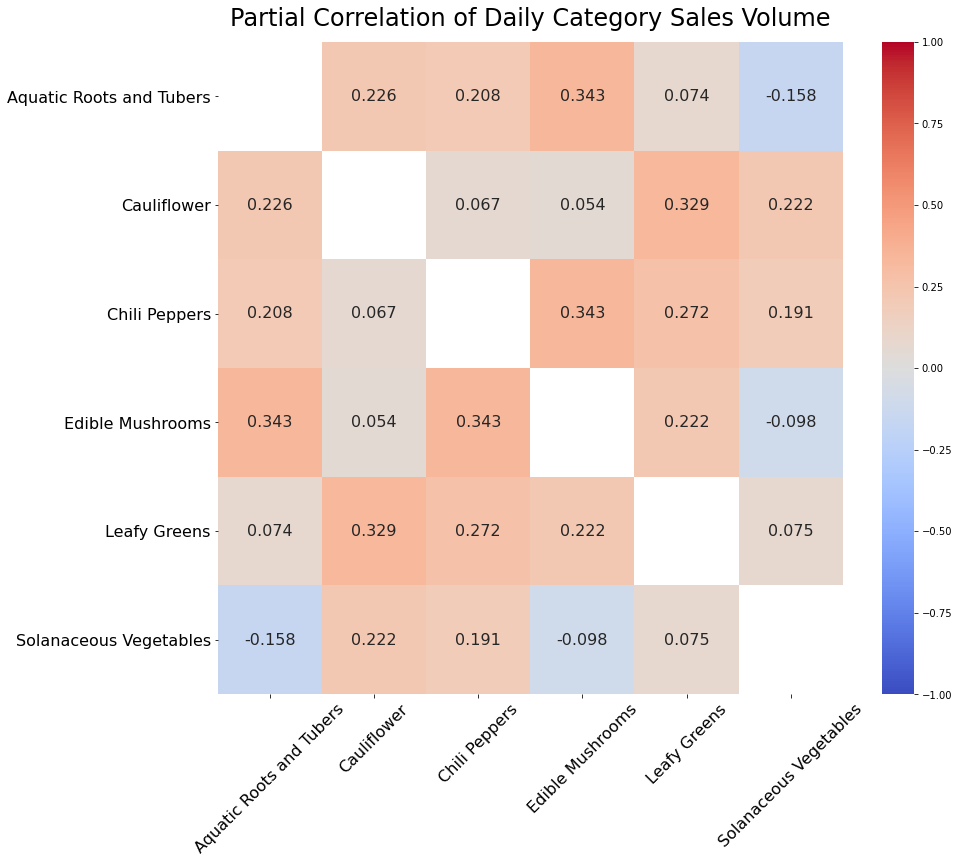

In [78]:
categories = list(daily_category_quantity.columns)
partial_corr_df = pd.DataFrame(partial_corr_matrix, index=categories, columns=categories)
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(partial_corr_df, 
            annot=True, 
            ax=ax, 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1,
            fmt=".3f", 
            annot_kws={"size":16})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)
ax.set_title('Partial Correlation of Daily Category Sales Volume', fontsize=24, pad=16)
plt.show()

fig.savefig('../figures/category_sales_partial_corr.jpg', dpi=600)

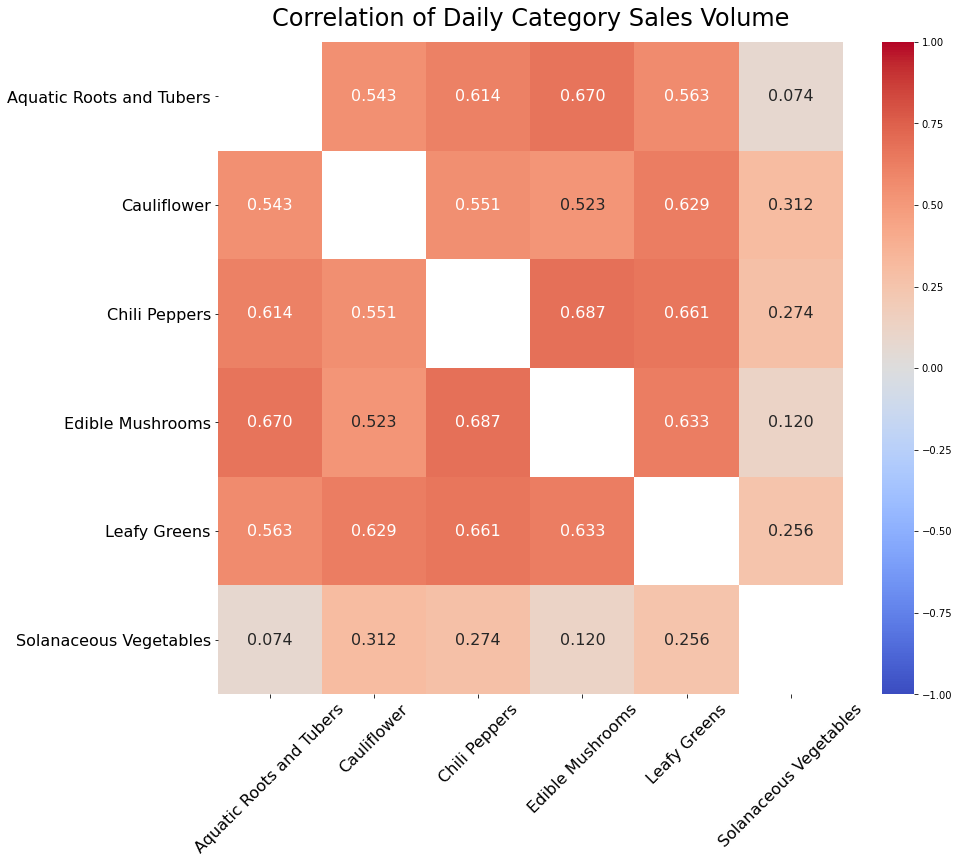

In [80]:
for i in range(0, corr_matrix.shape[0]):
    for j in range(0, corr_matrix.shape[1]):
        if i==j:
            corr_matrix[i,j] = None
categories = list(daily_category_quantity.columns)
corr_df = pd.DataFrame(corr_matrix, index=categories, columns=categories)
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(corr_df, 
            annot=True, 
            ax=ax, 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1,
            fmt=".3f", 
            annot_kws={"size":16})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)
ax.set_title('Correlation of Daily Category Sales Volume', fontsize=24, pad=16)
plt.show()

fig.savefig('../figures/category_sales_pearson_corr.jpg', dpi=600)

# 2. Analyze Items 